In [1]:
import pandas as pd

# Load the datasets
glass_path = "D:\Excelr\Data Science\Data Science Assignment\Random Forest\Random Forest\glass.csv"
glass_df = pd.read_csv(glass_path)
glass_head = glass_df.head()

glass_head


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0


In [2]:
# missing values in the dataset
missing_values = glass_df.isnull().sum()
data_info = glass_df.info()
data_description = glass_df.describe()

missing_values, data_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    float64
dtypes: float64(10)
memory usage: 78.2 KB


(RI      785
 Na      785
 Mg      785
 Al      785
 Si      785
 K       785
 Ca      785
 Ba      785
 Fe      785
 Type    785
 dtype: int64,
                RI          Na          Mg          Al          Si           K  \
 count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
 mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
 std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
 min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
 25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
 50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
 75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
 max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   
 
                Ca          Ba          Fe        Type  
 count  214.000000  214.000000  214.000000  214.000000  
 

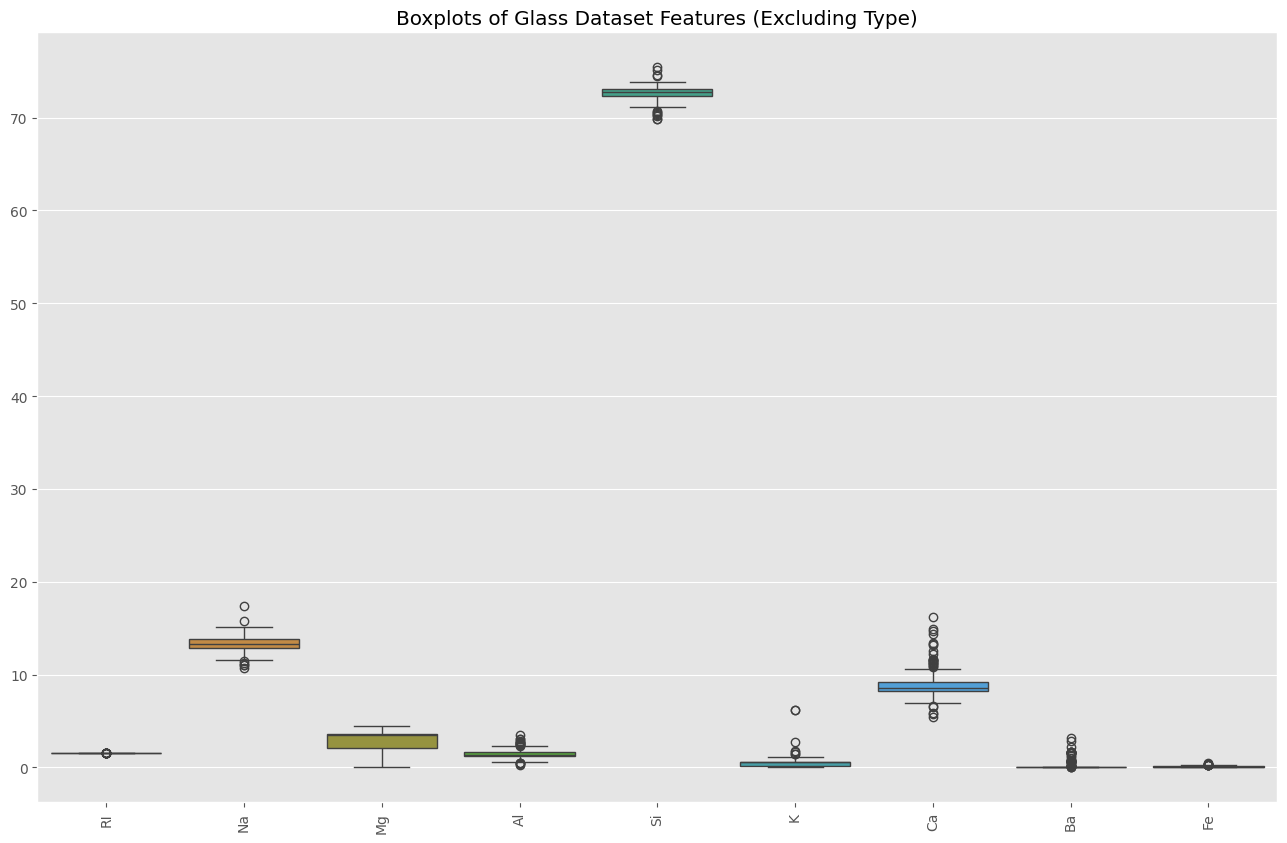

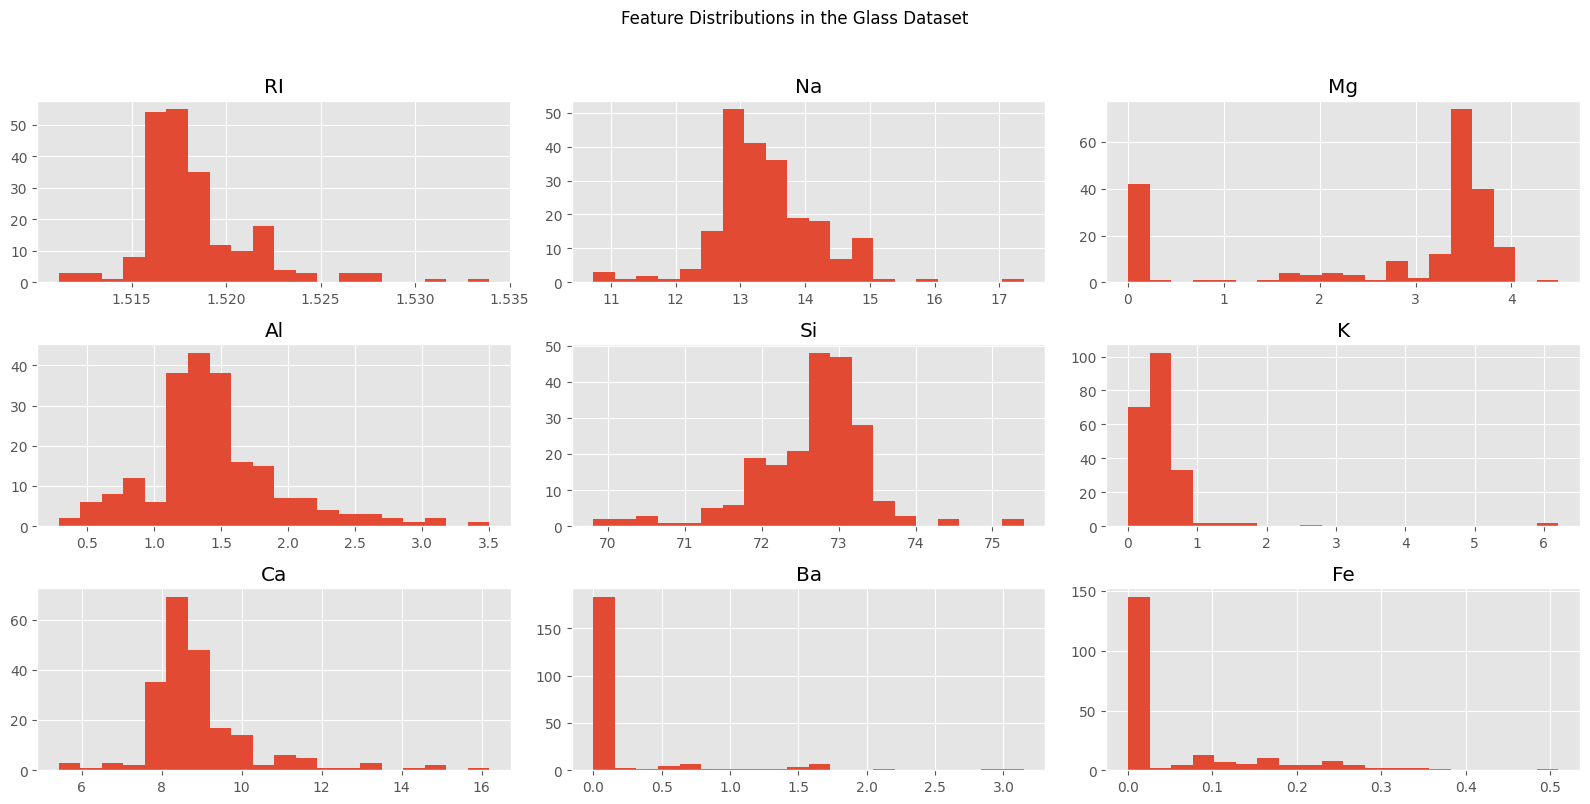

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plot style
plt.style.use('ggplot')
# Visualizing boxplots
plt.figure(figsize=(16, 10))
sns.boxplot(data=glass_df.drop(columns=['Type']))
plt.title('Boxplots of Glass Dataset Features (Excluding Type)')
plt.xticks(rotation=90)
plt.show()
# Plotting the distribution of each feature
glass_df.drop(columns=['Type']).hist(bins=20, figsize=(16, 10), layout=(4,3))
plt.suptitle('Feature Distributions in the Glass Dataset', y=1.02)
plt.tight_layout()
plt.show()

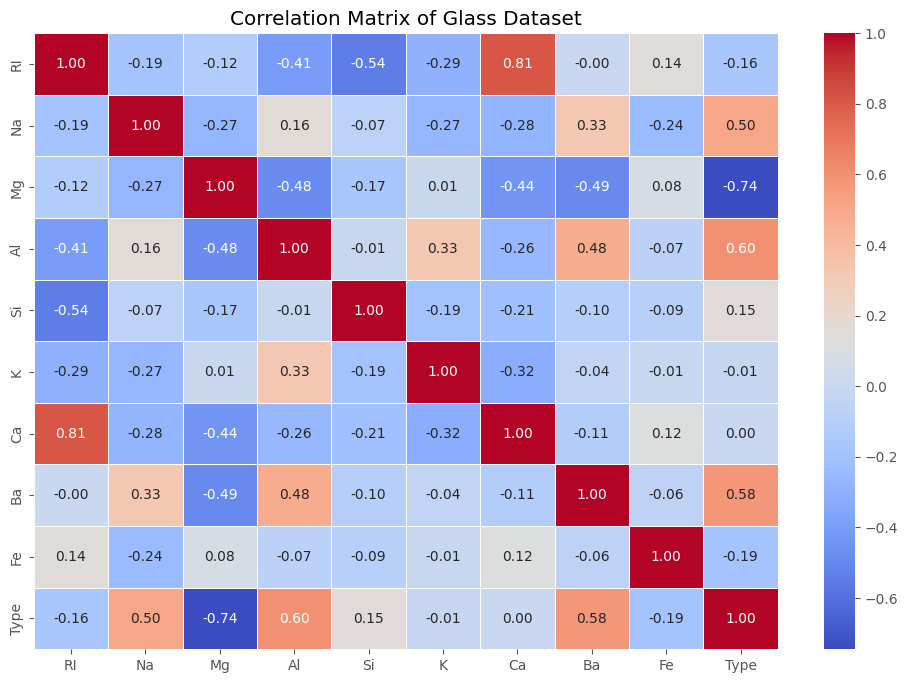

In [4]:
# Correlation
correlation_matrix = glass_df.corr()
# Plotting the heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Glass Dataset')
plt.show()

In [5]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Step 1: missing values using the mean for numerical columns
imputer = SimpleImputer(strategy='mean')
glass_df_imputed = pd.DataFrame(imputer.fit_transform(glass_df), columns=glass_df.columns)
# Step 2: Standardization (z-score normalization)
scaler = StandardScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(glass_df_imputed.drop(columns=['Type'])), columns=glass_df_imputed.columns[:-1])
# target variable back to the scaled dataset
glass_df_scaled = pd.concat([scaled_features, glass_df_imputed['Type']], axis=1)
# Step 3: imbalance in the target variable
class_distribution = glass_df_scaled['Type'].value_counts()

glass_df_scaled.head(), class_distribution

(         RI        Na        Mg        Al        Si         K        Ca  \
 0  1.885924  0.615672  2.710781 -1.496095 -2.435182 -1.451292 -0.314944   
 1 -0.538712  1.278685  1.374509 -0.368298  0.221071 -0.056637 -1.714947   
 2 -1.558485  0.323947  1.299438  0.412485  0.948046 -0.355491 -1.791034   
 3 -0.503055 -0.524709  1.509638 -0.671935 -0.114455  0.242218 -1.121467   
 4 -0.674206 -0.365586  1.404538 -0.888820  1.199691  0.175806 -1.349729   
 
          Ba       Fe  Type  
 0 -0.762428 -1.26709   1.0  
 1 -0.762428 -1.26709   1.0  
 2 -0.762428 -1.26709   1.0  
 3 -0.762428 -1.26709   1.0  
 4 -0.762428 -1.26709   1.0  ,
 2.780374    785
 2.000000     76
 1.000000     70
 7.000000     29
 3.000000     17
 5.000000     13
 6.000000      9
 Name: Type, dtype: int64)

In [23]:
from sklearn.utils import resample
X = glass_df_scaled.drop(columns=['Type'])
y = glass_df_scaled['Type']

# Combine features and target for easy resampling
data_resampled = pd.concat([X, y], axis=1)
# Separate majority and minority classes
majority_class = data_resampled[data_resampled['Type'] == 2.0]
minority_classes = data_resampled[data_resampled['Type'] != 2.0]
# Oversample minority classes
minority_oversampled = resample(minority_classes,replace=True,n_samples=len(majority_class),random_state=42)
# Combine majority class with oversampled minority classes
data_balanced = pd.concat([majority_class, minority_oversampled])
# Check the new class distribution
balanced_class_distribution = data_balanced['Type'].value_counts()

balanced_class_distribution

2.000000    76
2.780374    62
1.000000     5
7.000000     3
5.000000     3
6.000000     2
3.000000     1
Name: Type, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

X = glass_df_scaled.drop(columns=['Type'])
y = glass_df_scaled['Type'].astype(int)
# random oversampling again to balance the dataset
majority_class = data_resampled[data_resampled['Type'] == 2.0]
minority_classes = data_resampled[data_resampled['Type'] != 2.0]
# Oversample minority classes
minority_oversampled = resample(minority_classes,replace=True,n_samples=len(majority_class),random_state=42)
# Combine majority class with oversampled minority classes
data_balanced = pd.concat([majority_class, minority_oversampled])
# Separate the features and target again from the balanced data
X_balanced = data_balanced.drop(columns=['Type'])
y_balanced = data_balanced['Type'].astype(int)
# Step 1: train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)
# Step 2: Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
# Step 3: Train the model on the training dataset
rf_classifier.fit(X_train, y_train)
# Step 4: Make predictions on the test dataset
y_pred = rf_classifier.predict(X_test)
# Evaluate the model's performance using accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
# Generate classification report
classification_rep = classification_report(y_test, y_pred)

accuracy, precision, recall, f1, classification_rep

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(

(0.9130434782608695,
 0.8521739130434783,
 0.9130434782608695,
 0.8815592203898052,
 '              precision    recall  f1-score   support\n\n           1       0.00      0.00      0.00         2\n           2       0.93      1.00      0.97        42\n           5       0.00      0.00      0.00         1\n           6       0.00      0.00      0.00         0\n           7       0.00      0.00      0.00         1\n\n    accuracy                           0.91        46\n   macro avg       0.19      0.20      0.19        46\nweighted avg       0.85      0.91      0.88        46\n')

In [25]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Step 1: Bagging Classifier with Decision Trees
bagging_classifier = BaggingClassifier(n_estimators=100, random_state=42)
bagging_classifier.fit(X_train, y_train)
y_pred_bagging = bagging_classifier.predict(X_test)
# Step 2: AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_classifier.fit(X_train, y_train)
y_pred_adaboost = adaboost_classifier.predict(X_test)
# Step 3: Gradient Boosting Classifier
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boosting_classifier.fit(X_train, y_train)
y_pred_gradient = gradient_boosting_classifier.predict(X_test)
# performance of each model
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
    return accuracy, precision, recall, f1
# Bagging
bagging_results = evaluate_model(y_test, y_pred_bagging)
# AdaBoost
adaboost_results = evaluate_model(y_test, y_pred_adaboost)
# Gradient Boosting
gradient_boosting_results = evaluate_model(y_test, y_pred_gradient)

bagging_results, adaboost_results, gradient_boosting_results

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


((0.9130434782608695,
  0.9391304347826087,
  0.9130434782608695,
  0.8815592203898052),
 (0.8913043478260869,
  0.9160079051383399,
  0.8913043478260869,
  0.8705763397371082),
 (0.8260869565217391,
  0.8735507246376812,
  0.8260869565217391,
  0.8348356309650053))